# Using ESOL dataset with the splits as what you did in Task 2 of HW4 and using RMSE as the performance measure: to train a neural network model on the ESOL dataset  by using Morgan fingerprints as input features and RMSE as the performance measure as well as the cost function.  Please do similar explorations as what you did for HW8C, report performance measure for all three datasets, summarize what you have learned from this experiment, and discuss what are similar or different from what you observed in HW8C.  Please  compare your results of you optimal NN model (RMSE) with your optimal random forest model that have been developed in TASK 2 of HW4.

In [1]:
!pip install rdkit-pypi
!pip install scikit-learn
!pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [2]:
# import modules
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# open csv file
dataset = pd.read_csv('delaney-processed.csv')

In [4]:
dataset.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [5]:
# split training, validation, and test set into 8:1:1 ratio
from sklearn.model_selection import train_test_split
train, temp = train_test_split(dataset, test_size=0.2, random_state=42)
test, val = train_test_split(temp, test_size=0.5, random_state=42)

# verify length of each set
print('Training set length: ', len(train))
print('Validation set length: ', len(val))
print('Test set length: ', len(test))

Training set length:  902
Validation set length:  113
Test set length:  113


In [6]:
# check for duplicates and remove them
duplicates_smiles = dataset[dataset['smiles'].duplicated()]['smiles'].values
len(duplicates_smiles)

0

In [7]:
dataset_new = dataset.drop_duplicates(subset=['smiles'])
dataset_new

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


In [8]:
# define function to calculate morgan fingerprints
Morgan_fpts = []
solubility = []
for i in range(len(dataset_new)):
    mol = Chem.MolFromSmiles(dataset_new['smiles'][i])
    if mol != None:
        Morgan_fpts.append(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024))
        solubility.append(dataset_new['measured log solubility in mols per litre'][i])

In [9]:
# convert fingerprints to numpy array
Morgan_fpts = np.array(Morgan_fpts)
solubility = np.array(solubility)

In [10]:
# check datatype
type(Morgan_fpts), type(solubility)

(numpy.ndarray, numpy.ndarray)

## Activation Function: ReLU
## Optimizer: Adam

In [11]:
# develop neural network architecture
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# define function to build neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
    
input_size = 1024
hidden_size = 32
output_size = 1
net = Net(input_size, hidden_size, output_size)

In [12]:
# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [13]:
# train model
epochs = 10
losses = []
for i in range(epochs):
    for j in range(len(Morgan_fpts)):
        X = torch.tensor(Morgan_fpts[j], dtype=torch.float)
        y = torch.tensor(solubility[j], dtype=torch.float)
        optimizer.zero_grad()
        output = net(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    losses.append(loss)
    print(f"Epoch {i} Loss: {loss}")

/home/ac7407/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss: 0.028949495404958725
Epoch 1 Loss: 0.3293206989765167
Epoch 2 Loss: 0.3829183578491211
Epoch 3 Loss: 0.057091981172561646
Epoch 4 Loss: 0.1296200156211853
Epoch 5 Loss: 0.012891370803117752
Epoch 6 Loss: 0.27158600091934204
Epoch 7 Loss: 0.02405419386923313
Epoch 8 Loss: 0.06588365137577057
Epoch 9 Loss: 0.03476111590862274


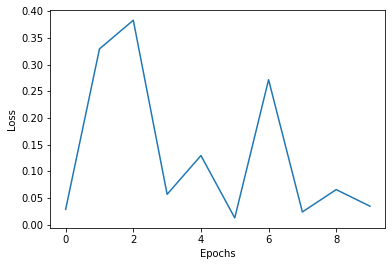

In [14]:
# plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [15]:
# define function to print accuracy and store predictions
def accuracy(net):
    with torch.no_grad():
        correct = 0
        total = 0
        predictions = []
        accuracy_list = []
        for j in range(len(Morgan_fpts)):
            X = torch.tensor(Morgan_fpts[j], dtype=torch.float)
            y = torch.tensor(solubility[j], dtype=torch.float)
            output = net(X)
            predictions.append(output)
            total += 1
            if abs(output - y) < 0.5:
                correct += 1
        print(f"Accuracy: {round(correct/total, 3)}")
        
        # store accuracy value in a list
        accuracy_list.append(round(correct/total, 3))

In [16]:
# print accuracy
accuracy(net)

Accuracy: 0.746


## Activation Function: ReLU
## Optimizer: SGD

In [17]:
# define function to build neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
    
input_size = 1024
hidden_size = 32
output_size = 1
net = Net(input_size, hidden_size, output_size)

In [18]:
# define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [19]:
# train model
epochs = 10
losses = []
for i in range(epochs):
    for j in range(len(Morgan_fpts)):
        X = torch.tensor(Morgan_fpts[j], dtype=torch.float)
        y = torch.tensor(solubility[j], dtype=torch.float)
        optimizer.zero_grad()
        output = net(X)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
    losses.append(loss)
    print(f"Epoch {i} Loss: {loss}")

Epoch 0 Loss: 0.6214038133621216
Epoch 1 Loss: 0.4747333228588104
Epoch 2 Loss: 0.694072425365448
Epoch 3 Loss: 0.726055920124054
Epoch 4 Loss: 0.598105251789093
Epoch 5 Loss: 0.4475076198577881
Epoch 6 Loss: 0.3616594672203064
Epoch 7 Loss: 0.2972137928009033
Epoch 8 Loss: 0.20005549490451813
Epoch 9 Loss: 0.2689622640609741


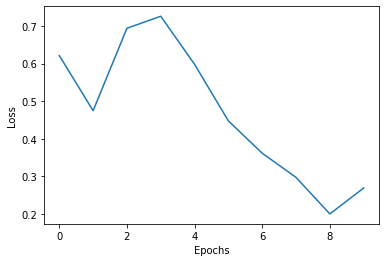

In [20]:
# plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [21]:
# print accuracy
accuracy(net)

Accuracy: 0.655


## Activation Function: ReLU
## Optimizer: RMSprop

In [22]:
# define function to build neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
    
input_size = 1024
hidden_size = 32
output_size = 1
net = Net(input_size, hidden_size, output_size)

In [23]:
# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.RMSprop(net.parameters(), lr=0.001)

In [24]:
# train model
epochs = 10
losses = []
for i in range(epochs):
    for j in range(len(Morgan_fpts)):
        X = torch.tensor(Morgan_fpts[j], dtype=torch.float)
        y = torch.tensor(solubility[j], dtype=torch.float)
        optimizer.zero_grad()
        output = net(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    losses.append(loss)
    print(f"Epoch {i} Loss: {loss}")

Epoch 0 Loss: 0.38646411895751953
Epoch 1 Loss: 0.5157749056816101
Epoch 2 Loss: 0.18443593382835388
Epoch 3 Loss: 0.049469903111457825
Epoch 4 Loss: 0.06369777768850327
Epoch 5 Loss: 0.0025648067239671946
Epoch 6 Loss: 0.09680783748626709
Epoch 7 Loss: 0.08211202174425125
Epoch 8 Loss: 0.11703870445489883
Epoch 9 Loss: 0.012592536397278309


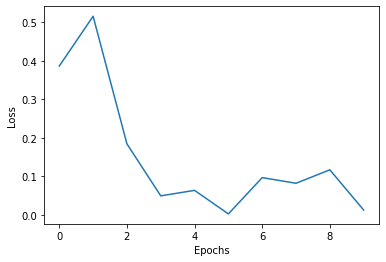

In [25]:
# plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [26]:
# print accuracy
accuracy(net)

Accuracy: 0.729


## Activation Function: Sigmoid
## Optimizer: Adam

In [27]:
# define function to build neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        return x
    
input_size = 1024
hidden_size = 32
output_size = 1
net = Net(input_size, hidden_size, output_size)

In [28]:
# define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [29]:
# train model
epochs = 10
losses = []
for i in range(epochs):
    for j in range(len(Morgan_fpts)):
        X = torch.tensor(Morgan_fpts[j], dtype=torch.float)
        y = torch.tensor(solubility[j], dtype=torch.float)
        optimizer.zero_grad()
        output = net(X)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
    losses.append(loss)
    print(f"Epoch {i} Loss: {loss}")

Epoch 0 Loss: 2.1025500297546387
Epoch 1 Loss: 1.341616153717041
Epoch 2 Loss: 1.4829587936401367
Epoch 3 Loss: 1.389559030532837
Epoch 4 Loss: 1.2861416339874268
Epoch 5 Loss: 1.1601778268814087
Epoch 6 Loss: 0.9818843007087708
Epoch 7 Loss: 0.7919244766235352
Epoch 8 Loss: 0.6232808828353882
Epoch 9 Loss: 0.49230456352233887


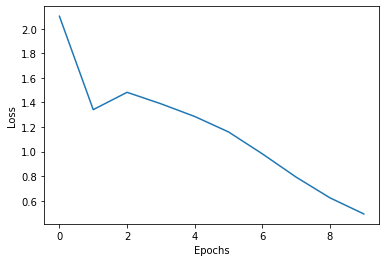

In [30]:
# plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [31]:
# print accuracy
accuracy(net)

Accuracy: 0.686


## Activation Function: Sigmoid
## Optimizer: SGD

In [32]:
# define function to build neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        return x
    
input_size = 1024
hidden_size = 32
output_size = 1
net = Net(input_size, hidden_size, output_size)

In [33]:
# define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [34]:
# train model
epochs = 10
losses = []
for i in range(epochs):
    for j in range(len(Morgan_fpts)):
        X = torch.tensor(Morgan_fpts[j], dtype=torch.float)
        y = torch.tensor(solubility[j], dtype=torch.float)
        optimizer.zero_grad()
        output = net(X)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
    losses.append(loss)
    print(f"Epoch {i} Loss: {loss}")

Epoch 0 Loss: 2.7222084999084473
Epoch 1 Loss: 2.7106759548187256
Epoch 2 Loss: 2.6972782611846924
Epoch 3 Loss: 2.6808457374572754
Epoch 4 Loss: 2.659921646118164
Epoch 5 Loss: 2.632596492767334
Epoch 6 Loss: 2.596269130706787
Epoch 7 Loss: 2.547269105911255
Epoch 8 Loss: 2.4802751541137695
Epoch 9 Loss: 2.3874170780181885


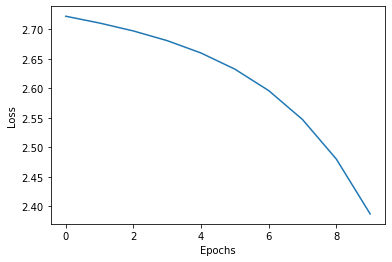

In [35]:
# plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [36]:
# print accuracy
accuracy(net)

Accuracy: 0.197


## Activation Function: Sigmoid
## Optimizer: RMSprop

In [37]:
# define function to build neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        return x
    
input_size = 1024
hidden_size = 32
output_size = 1
net = Net(input_size, hidden_size, output_size)

In [38]:
# define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.RMSprop(net.parameters(), lr=0.001)

In [39]:
# train model
epochs = 10
losses = []
for i in range(epochs):
    for j in range(len(Morgan_fpts)):
        X = torch.tensor(Morgan_fpts[j], dtype=torch.float)
        y = torch.tensor(solubility[j], dtype=torch.float)
        optimizer.zero_grad()
        output = net(X)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
    losses.append(loss)
    print(f"Epoch {i} Loss: {loss}")

Epoch 0 Loss: 1.7961416244506836
Epoch 1 Loss: 0.996277928352356
Epoch 2 Loss: 1.1449600458145142
Epoch 3 Loss: 1.687139630317688
Epoch 4 Loss: 1.9213255643844604
Epoch 5 Loss: 1.8537557125091553
Epoch 6 Loss: 1.7107588052749634
Epoch 7 Loss: 1.4735649824142456
Epoch 8 Loss: 1.1546273231506348
Epoch 9 Loss: 0.9248617887496948


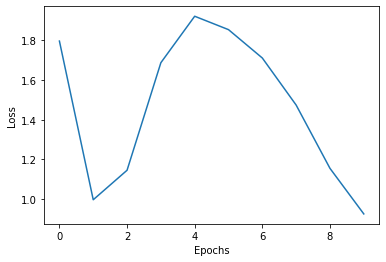

In [40]:
# plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [41]:
# print accuracy
accuracy(net)

Accuracy: 0.603


## Activation Function: Tanh
## Optimizer: Adam

In [42]:
# define function to build neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()
    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.tanh(x)
        x = self.fc3(x)
        return x
    
input_size = 1024
hidden_size = 32
output_size = 1
net = Net(input_size, hidden_size, output_size)

In [43]:
# define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [44]:
# train model
epochs = 10
losses = []
for i in range(epochs):
    for j in range(len(Morgan_fpts)):
        X = torch.tensor(Morgan_fpts[j], dtype=torch.float)
        y = torch.tensor(solubility[j], dtype=torch.float)
        optimizer.zero_grad()
        output = net(X)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
    losses.append(loss)
    print(f"Epoch {i} Loss: {loss}")

Epoch 0 Loss: 0.39950111508369446
Epoch 1 Loss: 0.37984198331832886
Epoch 2 Loss: 0.9787437915802002
Epoch 3 Loss: 0.8545719385147095
Epoch 4 Loss: 0.06545035541057587
Epoch 5 Loss: 0.23944926261901855
Epoch 6 Loss: 0.07350867986679077
Epoch 7 Loss: 0.6026619672775269
Epoch 8 Loss: 0.4390353262424469
Epoch 9 Loss: 0.05544019863009453


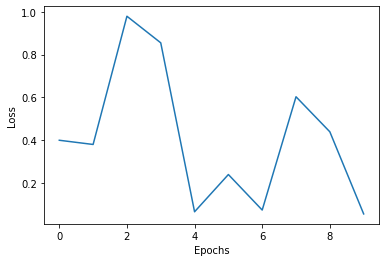

In [45]:
# plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [46]:
# print accuracy
accuracy(net)

Accuracy: 0.663


## Activation Function: Tanh
## Optimizer: SGD

In [47]:
# define function to build neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()
    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.tanh(x)
        x = self.fc3(x)
        return x
    
input_size = 1024
hidden_size = 32
output_size = 1
net = Net(input_size, hidden_size, output_size)

In [48]:
# define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [49]:
# train model
epochs = 10
losses = []
for i in range(epochs):
    for j in range(len(Morgan_fpts)):
        X = torch.tensor(Morgan_fpts[j], dtype=torch.float)
        y = torch.tensor(solubility[j], dtype=torch.float)
        optimizer.zero_grad()
        output = net(X)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
    losses.append(loss)
    print(f"Epoch {i} Loss: {loss}")

Epoch 0 Loss: 0.21169742941856384
Epoch 1 Loss: 0.44962817430496216
Epoch 2 Loss: 0.5405476689338684
Epoch 3 Loss: 0.4371943175792694
Epoch 4 Loss: 0.369704931974411
Epoch 5 Loss: 0.34165677428245544
Epoch 6 Loss: 0.3355944752693176
Epoch 7 Loss: 0.3425595760345459
Epoch 8 Loss: 0.35761260986328125
Epoch 9 Loss: 0.3757484257221222


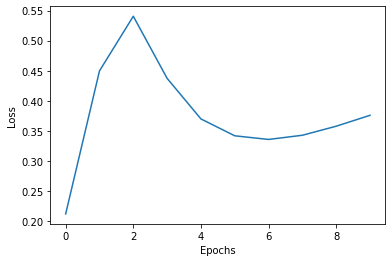

In [50]:
# plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [51]:
# print accuracy
accuracy(net)

Accuracy: 0.589


## Activation Function: Tanh
## Optimizer: RMSprop

In [52]:
# define function to build neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()
    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.tanh(x)
        x = self.fc3(x)
        return x
    
input_size = 1024
hidden_size = 32
output_size = 1
net = Net(input_size, hidden_size, output_size)

In [53]:
# define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.RMSprop(net.parameters(), lr=0.001)

In [54]:
# train model
epochs = 10
losses = []
for i in range(epochs):
    for j in range(len(Morgan_fpts)):
        X = torch.tensor(Morgan_fpts[j], dtype=torch.float)
        y = torch.tensor(solubility[j], dtype=torch.float)
        optimizer.zero_grad()
        output = net(X)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
    losses.append(loss)
    print(f"Epoch {i} Loss: {loss}")

Epoch 0 Loss: 1.153914213180542
Epoch 1 Loss: 0.8259592652320862
Epoch 2 Loss: 1.2657891511917114
Epoch 3 Loss: 0.871682345867157
Epoch 4 Loss: 0.4017704725265503
Epoch 5 Loss: 0.029530363157391548
Epoch 6 Loss: 0.0308737400919199
Epoch 7 Loss: 0.07608681172132492
Epoch 8 Loss: 0.026132168248295784
Epoch 9 Loss: 0.07098285853862762


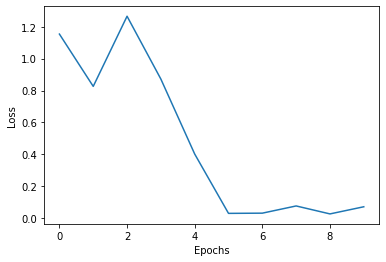

In [55]:
# plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [56]:
# print accuracy
accuracy(net)

Accuracy: 0.582


# Let's see what happens when creating a convolutional neural network.

In [57]:
# define function to build 1D convolutional neural network
def conv_1d(input_size, hidden_size, output_size):
    model = nn.Sequential(
        nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=2, stride=2),
        nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(64*256, 128),
        nn.ReLU(),
        nn.Linear(128, 1)
    )
    return model

input_size = 1024
hidden_size = 3
output_size = 1

conv_1d = conv_1d(input_size, hidden_size, output_size)

In [58]:
# define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [59]:
# train model
epochs = 10
losses = []
for i in range(epochs):
    for j in range(len(Morgan_fpts)):
        X = torch.tensor(Morgan_fpts[j], dtype=torch.float)
        y = torch.tensor(solubility[j], dtype=torch.float)
        optimizer.zero_grad()
        output = net(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    losses.append(loss)
    print(f"Epoch {i} Loss: {loss}")

Epoch 0 Loss: 0.11174535751342773
Epoch 1 Loss: 0.252071350812912
Epoch 2 Loss: 0.5442058444023132
Epoch 3 Loss: 0.018059229478240013
Epoch 4 Loss: 0.11238513886928558
Epoch 5 Loss: 0.0488533116877079
Epoch 6 Loss: 0.1241859719157219
Epoch 7 Loss: 2.130640983581543
Epoch 8 Loss: 0.15233542025089264
Epoch 9 Loss: 0.5038197636604309


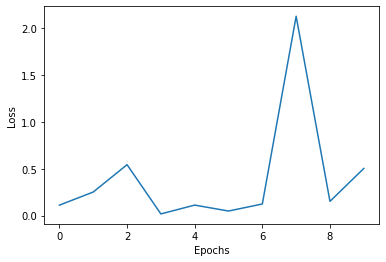

In [60]:
# plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [61]:
# print accuracy
accuracy(net)

Accuracy: 0.728


In [62]:
# compare with random forest model w/ best parameters
# Best hyperparameters:  {'max_features': 131, 'n_estimators': 150}
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=131, n_estimators=150)
rf.fit(Morgan_fpts, solubility)
print(f"Accuracy: {rf.score(Morgan_fpts, solubility)}")

Accuracy: 0.947434290226663


## Based on the trials, the bset performing model is using ReLU as activation funtion and the Adam optimizer (0.746) , though the 1D convolutional neural network model came close (0.728). However, the random forest model prevails (0.947).